# Análise Exploratória dos Dados (EDA)

In [12]:
# Importar bibliotecas necessárias
# pip install pandas seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Abrir o ficheiro com ; como separador
df = pd.read_csv('datasets/consumo_eredes_limpo.csv', sep=',')

In [14]:
# mostrar: count, mean, std (desvio padrão), min, 25%, 50%, 75%, max
df['Active Energy (kWh)'].describe()

count    3.727424e+06
mean     1.006610e+04
std      1.154807e+04
min      1.167000e+00
25%      2.660105e+03
50%      6.758455e+03
75%      1.354280e+04
max      1.508790e+05
Name: Active Energy (kWh), dtype: float64

| Estatística    | Significado             |
|----------------|-------------------------|
| count = 3.727.424 | Total de registos (sem valores negativos) |
| mean = 10.066,10 kWh | Valor médio de consumo por registo |
| std = 11.548,07 kWh | Desvio padrão (os valores ainda variam bastante) |
| min = 1,17 kWh | Mínimo consumo positivo registado |
| 25% = 2.660,11 kWh | 25% dos valores estão abaixo deste valor |
| 50% = 6.758,46 kWh | Mediana (valor do meio) |
| 75% = 13.542,80 kWh | 75% dos valores estão abaixo deste valor |
| max = 150.879,00 kWh | Maior valor registado (alto, mas plausível) |

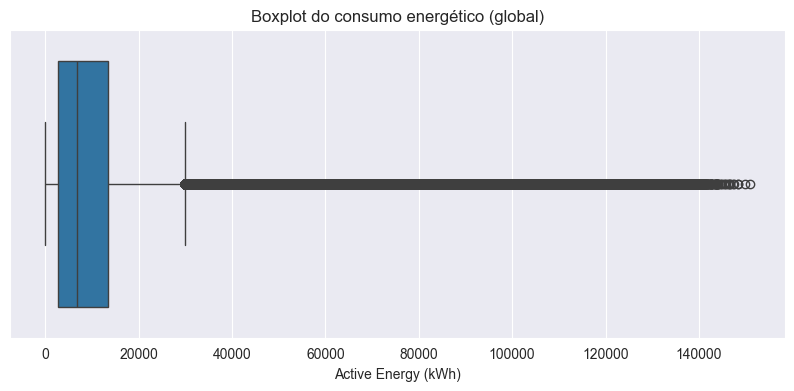

In [15]:
# Boxplot global
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Active Energy (kWh)'])
plt.title("Boxplot do consumo energético (global)")
plt.show()

📈 Interpretação:
- O gráfico mostra que a maioria dos valores está concentrada em consumos mais baixos (até ~13.500 kWh).

- Os consumos acima dos 35.000–40.000 kWh são considerados outliers estatísticos, mesmo que possam ser reais.

- A densidade de outliers é alta, o que indica variabilidade nos dados — pode ser devido a zonas industriais, grandes edifícios ou regiões com maior produção.

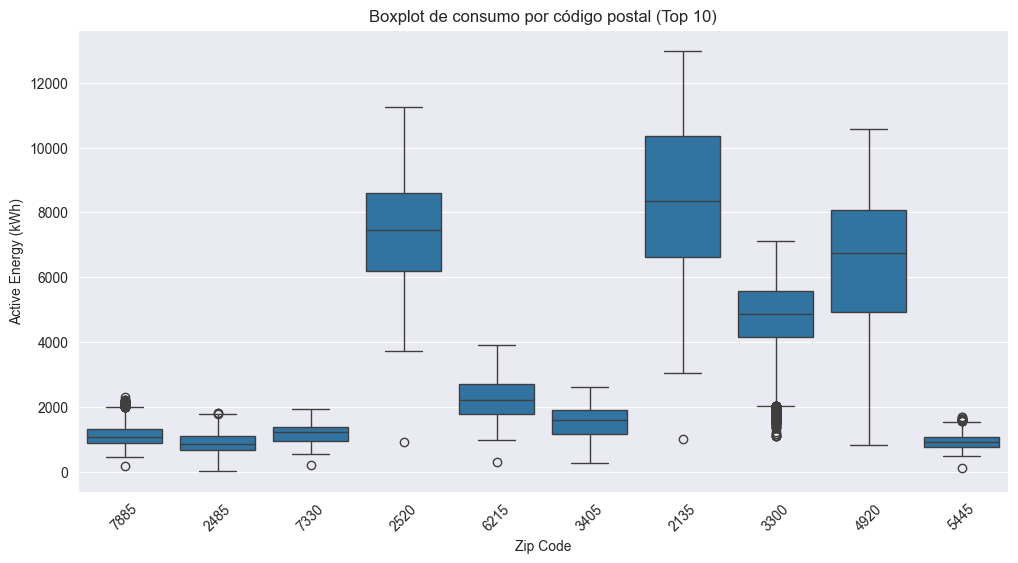

In [16]:
# Boxplots por código postal (comparativo)
# Se tiveres muitos códigos postais, escolhe os top 10 com mais dados:
top_zips = df['Zip Code'].value_counts().head(10).index
df_top = df[df['Zip Code'].isin(top_zips)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Zip Code', y='Active Energy (kWh)', data=df_top)
plt.title("Boxplot de consumo por código postal (Top 10)")
plt.xticks(rotation=45)
plt.show()

📈 Interpretação:
- A análise por código postal mostra variações significativas na distribuição de consumo energético. Códigos como 2135 e 2520 apresentam médias e máximos mais elevados, o que sugere zonas com maior atividade energética.

- Em contrapartida, códigos como 2485 e 7330 apresentam padrões de consumo mais baixos e consistentes. Outliers estão presentes em quase todas as regiões, indicando a existência de picos ocasionais que podem afetar previsões locais.

In [17]:
# Converter a coluna para datetime
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Garantir que Datetime é o índice
df.set_index('Datetime', inplace=True)

# 📊Gráfico de consumo total agregado ao longo do tempo

In [18]:
# Resumir os dados por mês
df_mensal = df.resample('ME').sum()

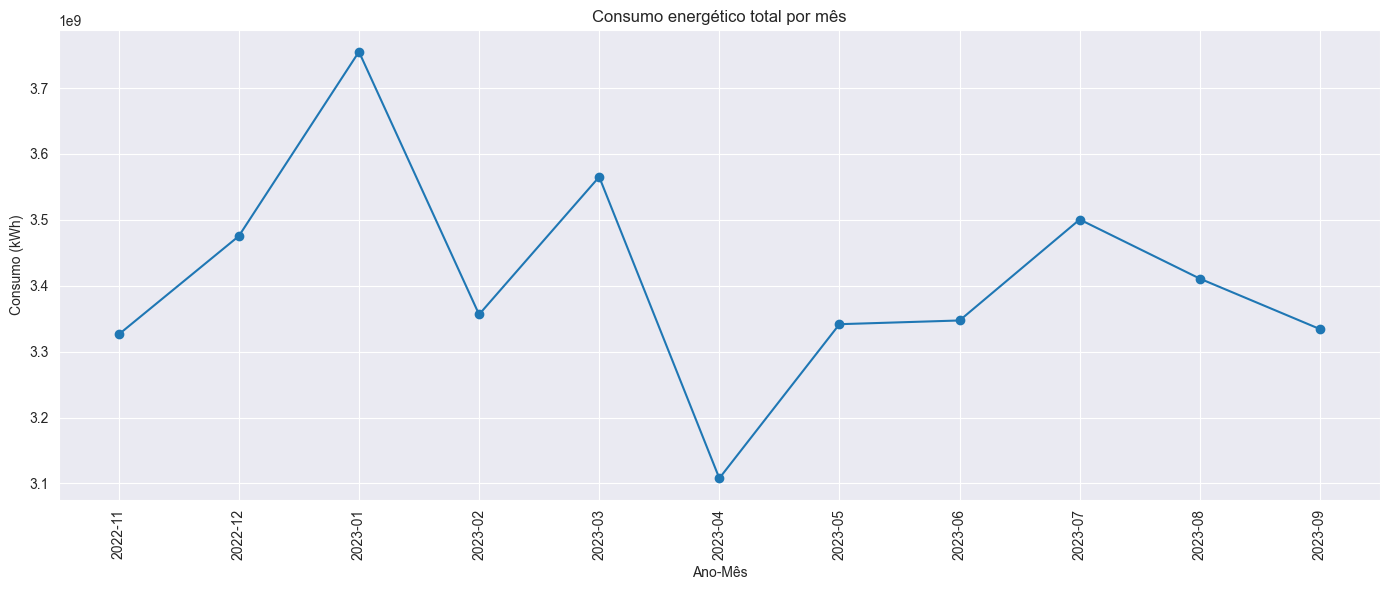

In [21]:
# Cria uma coluna com o label formatado (ex: 2023-07)
df_mensal['Label'] = df_mensal.index.strftime('%Y-%m')

plt.figure(figsize=(14, 6))
plt.plot(df_mensal['Label'], df_mensal['Active Energy (kWh)'], marker='o')
plt.title('Consumo energético total por mês')
plt.xlabel('Ano-Mês')
plt.ylabel('Consumo (kWh)')
plt.grid(True)
plt.xticks(rotation=90)  # rotação para caber tudo
plt.tight_layout()
plt.show()

# 📈 Interpretação
- Existe um padrão sazonal claro: o consumo sobe no inverno e desce na primavera.
- Janeiro de 2023 marca o pico de consumo, o que faz sentido (frio, menos luz natural, mais tempo em casa).
- Abril de 2023 é o ponto mais baixo — pode coincidir com clima mais ameno, menos aquecimento, ou feriados prolongados.
- Os valores de verão (junho–agosto) são mais estáveis, mas ainda relativamente elevados — talvez devido a uso de ar condicionado ou turismo.



# 📊Gráfico do top 10 códigos postais com maior consumo total de energia


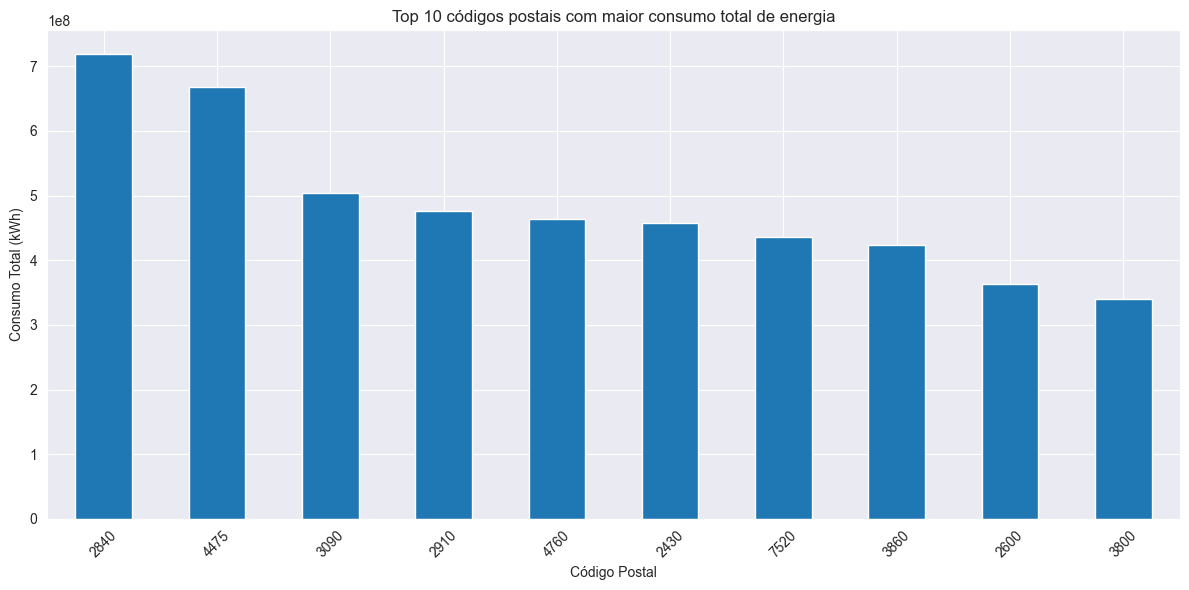

In [24]:
consumo_total_por_zip = df.groupby('Zip Code')['Active Energy (kWh)'].sum().sort_values(ascending=False)

consumo_total_por_zip.head(10).plot(kind='bar', figsize=(12,6))
plt.title('Top 10 códigos postais com maior consumo total de energia')
plt.xlabel('Código Postal')
plt.ylabel('Consumo Total (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📈 Interpretação
- Os maiores consumidores são, sem surpresa, zonas industriais ou urbanas muito densas.
- Sines (7520) é especialmente relevante, por ser uma zona energética estratégica do país.
- Palmela (2910) destaca-se por abrigar a Autoeuropa — uma das maiores fábricas de Portugal.
- Vila Nova de Famalicão, Marinha Grande, Estarreja e Vila Franca de Xira são conhecidas pela atividade industrial.
- Seixal (2840) está em 1.º lugar — zona com alta densidade populacional e consumo residencial elevado, além de alguns polos industriais.